<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout3_Conditional_MeanandVariance_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #3 : Conditional Mean & Variance Functions


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 3.1

Consider once again the Crater Impact study that was done here at Winona State Univeristy.  This study investigated the effect of certain variables on the size of an impact crater. 
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Diameter of crater (cm)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Hight from which projectile was dropped</li>
          <li>Projectile Type (glass, steel, or wood ball)</li>
          <li>Sand Type (course, fine)</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1-969XxPtKCcG9MeX4NMRfkTUTaMoj8cY"></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [46]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)

The **read_csv()** function is used to read in the dataset. 

In [47]:
#@title Reading in Data

# Reading data in using read.csv via Base 
ImpactCrater <- read_csv("http://www.StatsClass.org/stat360/Datasets/ImpactCrater.csv")

Rows: 144 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): SandType, ProjectileType
dbl (3): ID, Height, Diameter


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



The **head()** function can be used to see the first few lines of the dataset.

In [7]:
#@title View the first few rows of data
head(ImpactCrater)

ID,SandType,ProjectileType,Height,Diameter
<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,Coarse,WoodBall,25,3.75
2,Coarse,WoodBall,25,3.25
3,Coarse,WoodBall,25,3.50
4,Coarse,WoodBall,50,4.80
5,Coarse,WoodBall,50,4.50
6,Coarse,WoodBall,50,4.30


## Marginal Distribution

Getting the basic summaries for the marginal distribution.  In addition the Corrected Sum of Squares is calculated which represents the total unexplained variation.

$$
\begin{array}{rcl}
\mbox{Corrected SS} &  =  & \sum residuals^2 \\
 & = & Variance * (n-1) 
\end{array}
$$

In [8]:
#@title Getting relevent summary statistics for the marginal distribution

(ImpactCrater 
  %>% summarize(
                  Mean = mean(Diameter),
                  'Standard Deviation' = sd(Diameter),
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('Corrected SS' = Variance * (Count-1))
)

Mean,Standard Deviation,Variance,Count,Corrected SS
<dbl>,<dbl>,<dbl>,<int>,<dbl>
6.675694,1.724657,2.97444,144,425.3449


Note:  The total amount of unexplained variation in *marginal* distribution is 425.3.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



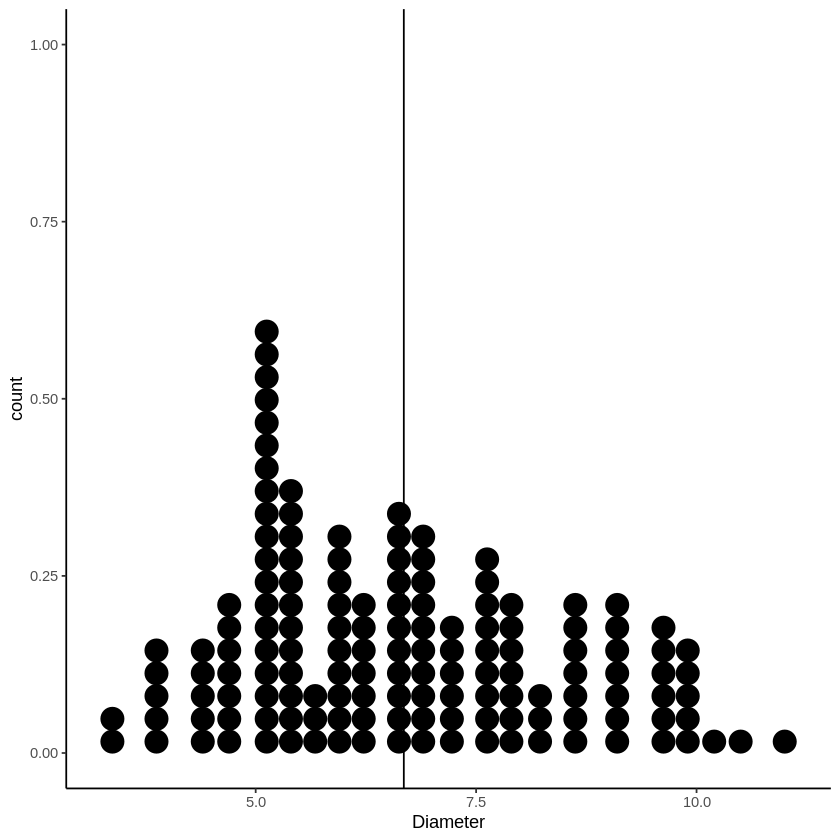

In [9]:
#@title Dotplot of Diameter with Reference Line at 6.68
ggplot(data=ImpactCrater, aes(x=Diameter) ) + 
  geom_dotplot() + 
  geom_vline(xintercept = 6.68) +
  labs(x="Diameter")+
  theme_classic()

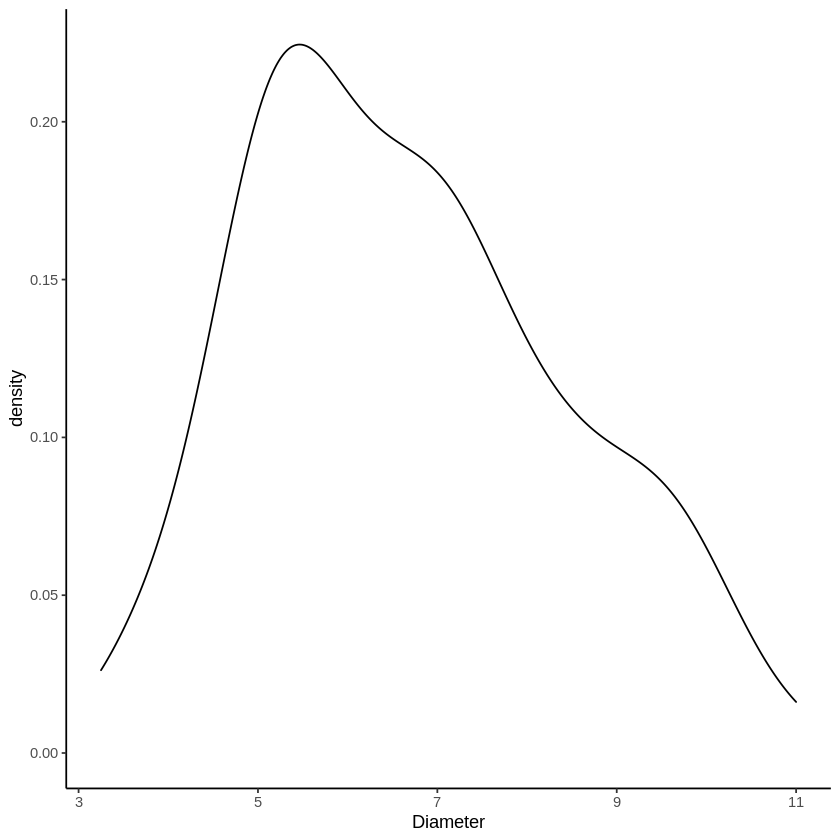

In [10]:
#@title Empirical Density Function 
ggplot(data=ImpactCrater, aes(x=Diameter)) + 
  geom_density(adjust=1) +
  theme_classic()

## Conditional Distribution of Diameter | Height

In [11]:
#@title Getting relevent summary statistics for Conditional Distribution

(ImpactCrater 
  %>% group_by(Height)
  %>% summarize(
                  Mean = mean(Diameter),
                  'Standard Deviation' = sd(Diameter),
                  Count = n()                
               )
)

Height,Mean,Standard Deviation,Count
<dbl>,<dbl>,<dbl>,<int>
25,4.983333,1.149424,18
50,5.752778,1.202506,18
75,6.238889,1.299837,18
100,6.658333,1.561226,18
125,7.005556,1.534878,18
150,7.327778,1.642113,18
175,7.544444,1.689491,18
200,7.894444,1.773488,18


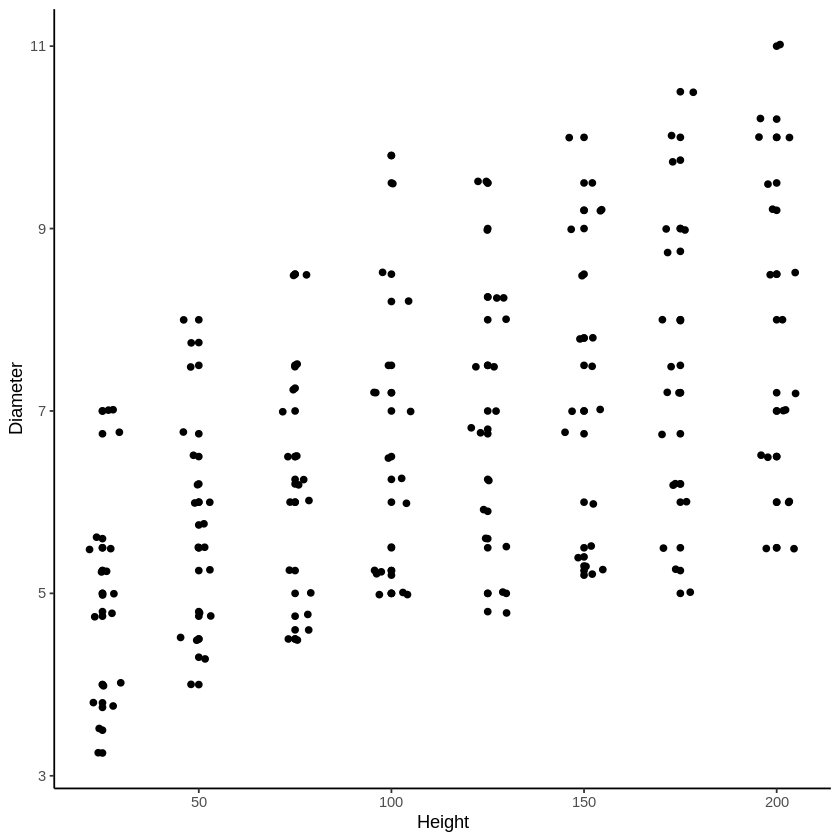

In [12]:
#@title Conditioning on Height
ggplot(data=ImpactCrater, aes(x=Height,y=Diameter)) + 
  geom_point() + 
  geom_jitter(width=5) +  #Add a little jitter to the points
  theme_classic()

To add the mean diameters to the scatterplot, one must obtain the means for each conditional distribution.  These values will be put into a data.frame called **ImpactCraterMeans**.  In addition, the left/right side of each line segment should be determined for the geom_segment() function.

In [13]:
#@title Creating data.frame containing the conditional means
ImpactCraterMeans <- (ImpactCrater 
  %>% group_by(Height)
  %>% summarize(
                 Mean = mean(Diameter),                
               )
  %>% mutate(
              LeftSide = Height - 10,
              RightSide = Height + 10
            )
)
ImpactCraterMeans

Height,Mean,LeftSide,RightSide
<dbl>,<dbl>,<dbl>,<dbl>
25,4.983333,15,35
50,5.752778,40,60
75,6.238889,65,85
100,6.658333,90,110
125,7.005556,115,135
150,7.327778,140,160
175,7.544444,165,185
200,7.894444,190,210


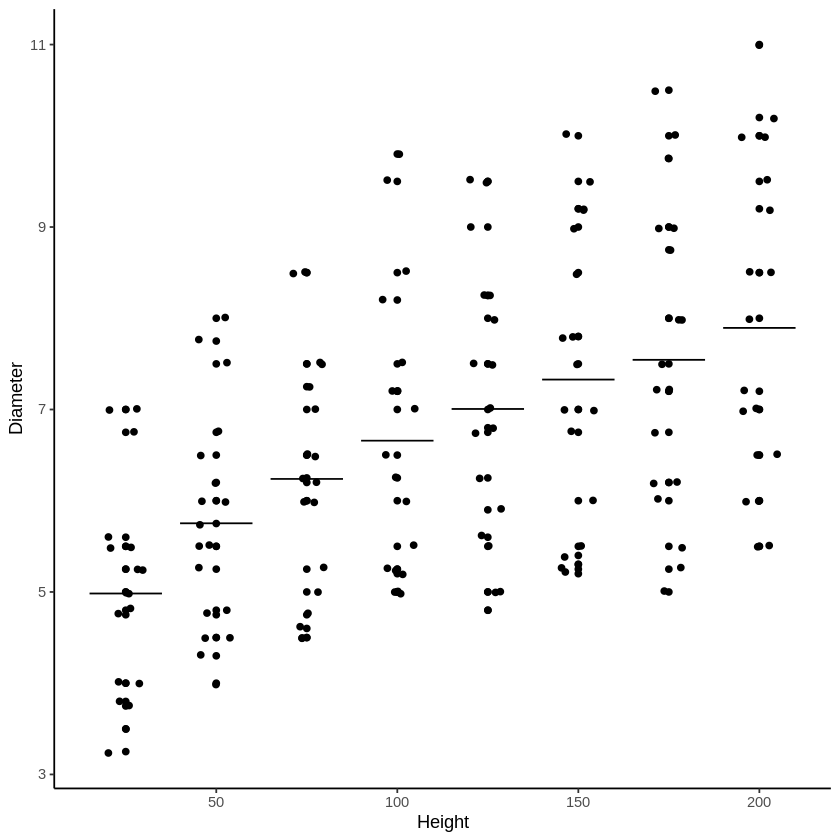

In [14]:
#@title Adding Conditional Means to the Plot
ggplot(data=ImpactCrater, aes(x=Height,y=Diameter) ) + 
  geom_point() + 
  geom_jitter(width=5) +  #Add a little jitter to the points
  theme_classic() +
  geom_segment(data = ImpactCraterMeans, aes(x = LeftSide, y = Mean, xend = RightSide, yend = Mean)) #Used to create the line segments for each conditional mean

## Computing $R^2$ when Conditioning on Height

In [15]:
#@title Getting total unexplained variation in marginal distribution

(ImpactCrater 
  %>% summarize(
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('Corrected SS Marginal' = Variance * (Count-1))
)

Variance,Count,Corrected SS Marginal
<dbl>,<int>,<dbl>
2.97444,144,425.3449


In [48]:
#@title Getting total unexplained variation in conditional distribution

(ImpactCrater 
  %>% group_by(Height)
  %>% summarize(
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('Corrected SS' = Variance * (Count-1))
   %>% summarize('Corrected SS Conditional' = sum(`Corrected SS`))  #Notice the special quotes here -- not single quote by slanted single quote
)

Corrected SS Conditional
<dbl>
305.0858


The $R^2$ is computed as follows

$$
\begin{array}{rcl}
R^2 & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}} \\
    & = & \frac{425.3 - 305.1}{425.3} \\ 
    & = & 0.2826 \\ 
\end{array}
$$

<u>Interpretation</u>: About 28 \% of the variation in Diameter can be explained by considering the height in which the projectile was dropped from.

## Investigating the Conditional Distributions of Height and ProjectileType

In [17]:
#@title Getting total unexplained variation in marginal distribution

(ImpactCrater 
  %>% summarize(
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('Corrected SS Marginal' = Variance * (Count-1))
)

Variance,Count,Corrected SS Marginal
<dbl>,<int>,<dbl>
2.97444,144,425.3449


Next, getting the Corrected SS in each conditional distribution.

In [18]:
#@title Getting unexplained variation in conditional distributions

(ImpactCrater 
  %>% group_by(Height, ProjectileType)
  %>% summarize(
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('Corrected SS' = Variance * (Count-1))
)

`summarise()` has grouped output by 'Height'. You can override using the `.groups` argument.



Height,ProjectileType,Variance,Count,Corrected SS
<dbl>,<chr>,<dbl>,<int>,<dbl>
25,GlassBall,0.14841667,6,0.7420833
25,SteelBall,0.93541667,6,4.6770833
25,WoodBall,0.08666667,6,0.4333333
50,GlassBall,0.12666667,6,0.6333333
50,SteelBall,0.87500000,6,4.3750000
50,WoodBall,0.08775000,6,0.4387500
75,GlassBall,0.05041667,6,0.2520833
75,SteelBall,0.41041667,6,2.0520833
75,WoodBall,0.09166667,6,0.4583333


In [19]:
#@title Getting total unexplained variation in conditional distributions

(ImpactCrater 
  %>% group_by(Height, ProjectileType)
  %>% summarize(
                  Variance = var(Diameter),
                  Count = n()                
               )
   %>% mutate('Corrected SS' = Variance * (Count-1))
   %>% ungroup()  #This is used to remove the effect of group_by() so that a sum can be computed over all conditional distributions
   %>% summarize('Corrected SS Conditional' = sum(`Corrected SS`))  #Notice the special quotes here -- not single quote by slanted single quote
)

`summarise()` has grouped output by 'Height'. You can override using the `.groups` argument.



Corrected SS Conditional
<dbl>
44.21083


Computing the updated $R^2$ value when conditioning on both Height and Projectile Type. 

$$
\begin{array}{rcl}
R^2 & = & \frac{\mbox{Total Unexplained Variation in Marginal} - \mbox{Total Unexplained Variation in Conditional}}{\mbox{Total Unexplained Variation in Marginal}} \\
    & = & \frac{425.3 - 44.2}{425.3} \\ 
    & = & \frac{381.1}{425.3} \\ 
    & = & 0.8961 \\ 
\end{array}
$$

<u>Interpretation</u>: About 90 \% of the variation in Diameter can be explained by considering the height from which the projectile was dropped from and the projectile type.

`summarise()` has grouped output by 'Height'. You can override using the `.groups` argument.



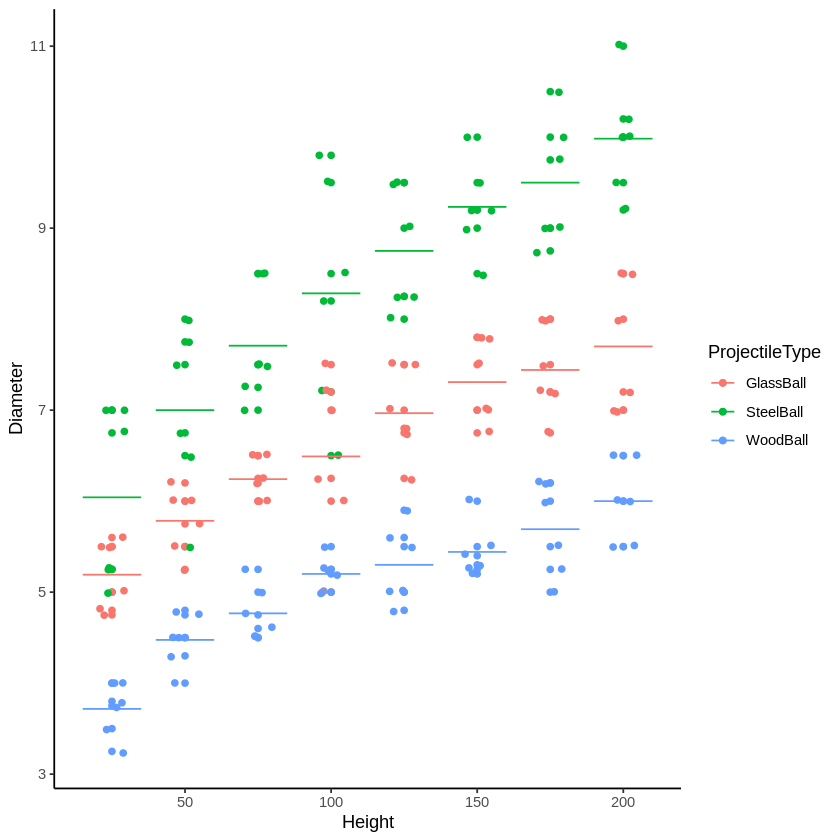

In [20]:
#@title Conditioning on Height and Projectile Type
#Get the means for each Height/ ProjectileType combination
  ImpactCraterMeans <- (ImpactCrater 
  %>% group_by(Height, ProjectileType)
  %>% summarize(
                 Mean = mean(Diameter),                
               )
  %>% mutate(
              LeftSide = Height - 10,
              RightSide = Height + 10
            )
  %>% ungroup()
)
#Creating the plot
ggplot(data=ImpactCrater, aes(x=Height,y=Diameter, color=ProjectileType)) + 
  geom_point() + 
  geom_jitter(width=5) +  #Add a little jitter to the points
  theme_classic() + 
  geom_segment(data = ImpactCraterMeans, aes(x = LeftSide, y = Mean, xend = RightSide, yend = Mean)) #Used to create the line segments for each conditional mean

## LOESS Fit to a Scatterplot

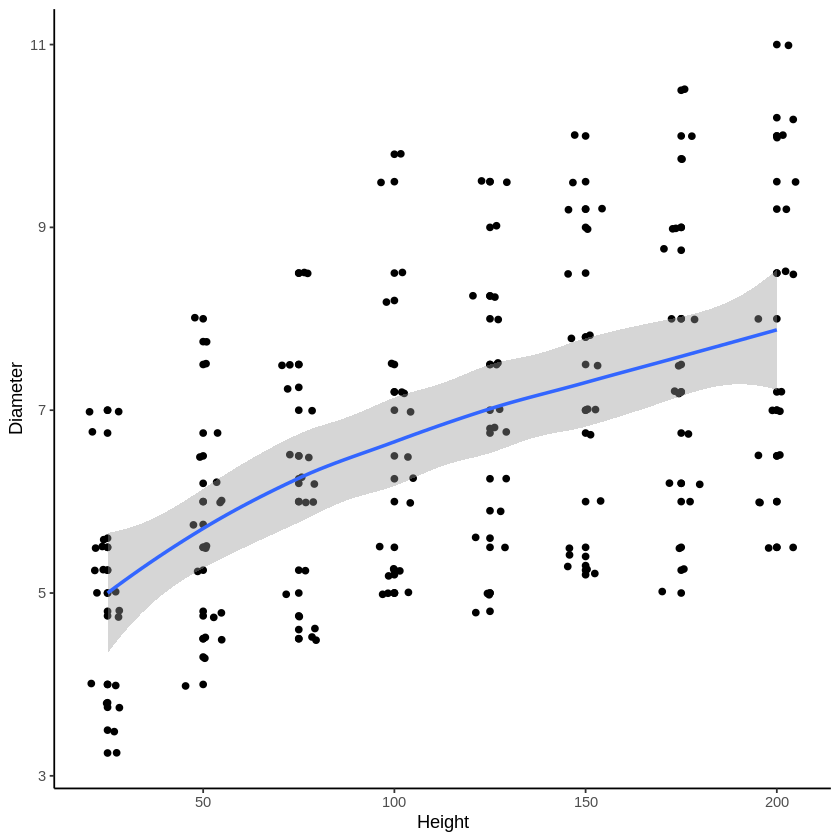

In [49]:
#@title Adding a Loess Fit to scatterplot
ggplot(data=ImpactCrater, aes(x=Height,y=Diameter)) + 
  geom_point() + 
  geom_jitter(width=5) +  #Add a little jitter to the points
  geom_smooth(method='loess', formula = y ~ x) + 
  #geom_smooth(method='loess', formula = y ~ x, span=0.50, se=FALSE) +  #Adds a lowess smoother to plot, method is lowess, span used for window size, and se=FALSE to turn of standard error shading
  theme_classic()

The following code can be used to obtain a loess fit for the conditional **mean** functions apart from the geom_smooth() function in ggplot.

Call:
loess(formula = Diameter ~ Height, data = ImpactCrater, span = 0.5)

Number of Observations: 144 
Equivalent Number of Parameters: 7.26 
Residual Standard Error: 1.502 

ID,SandType,ProjectileType,Height,Diameter,MeanPredicted
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Coarse,WoodBall,25,3.75,4.983333
2,Coarse,WoodBall,25,3.25,4.983333
3,Coarse,WoodBall,25,3.50,4.983333
4,Coarse,WoodBall,50,4.80,5.752778
5,Coarse,WoodBall,50,4.50,5.752778
6,Coarse,WoodBall,50,4.30,5.752778


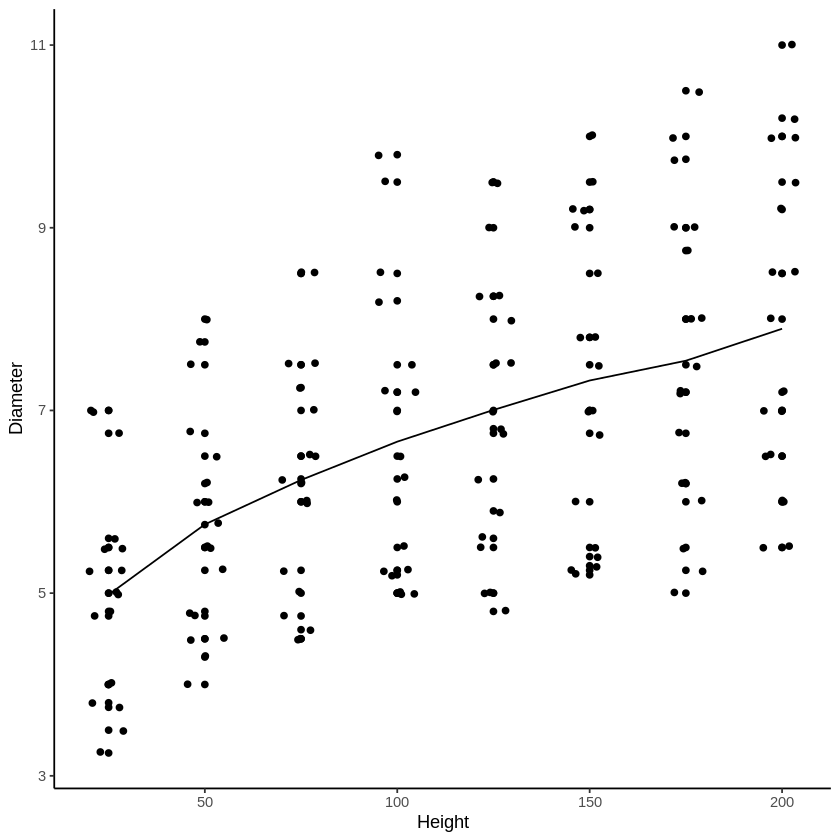

In [22]:
#Fit the loess smoother
LowessFitMeans <- loess(Diameter ~ Height, data = ImpactCrater, span=0.50)
LowessFitMeans

#Add predicted values for mean function to dataframe
ImpactCrater_with_MeanPrediction <- (
                                        ImpactCrater
                                        %>% mutate(MeanPredicted = predict(LowessFitMeans, newdata=ImpactCrater) )
                                      )
#View the first few rows of updated data.frame
head(ImpactCrater_with_MeanPrediction)

#Create plot with Conditional Mean Function via Loess
ggplot(data=ImpactCrater_with_MeanPrediction, aes(x=Height,y=Diameter)) + 
  geom_point() + 
  geom_jitter(width=5) +  
  geom_line(aes(x=Height, y=MeanPredicted)) +
  theme_classic()

Once a data.frame is creating containing the conditional mean predictions, we can easily compute the residuals and residuals^2 values.

In [26]:
#Appending residuals and their squared values to ImpactCrater the data.frame
ImpactCrater_with_LoessResiduals <- (ImpactCrater_with_MeanPrediction
                    %>% mutate(Residual = Diameter - MeanPredicted)
                    %>% mutate(ResidualSquared = Residual^2)
                )

head(ImpactCrater_with_LoessResiduals)



ID,SandType,ProjectileType,Height,Diameter,MeanPredicted,Residual,ResidualSquared
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Coarse,WoodBall,25,3.75,4.983333,-1.2333333,1.5211111
2,Coarse,WoodBall,25,3.25,4.983333,-1.7333333,3.0044444
3,Coarse,WoodBall,25,3.50,4.983333,-1.4833333,2.2002778
4,Coarse,WoodBall,50,4.80,5.752778,-0.9527778,0.9077855
5,Coarse,WoodBall,50,4.50,5.752778,-1.2527778,1.5694522
6,Coarse,WoodBall,50,4.30,5.752778,-1.4527778,2.1105633


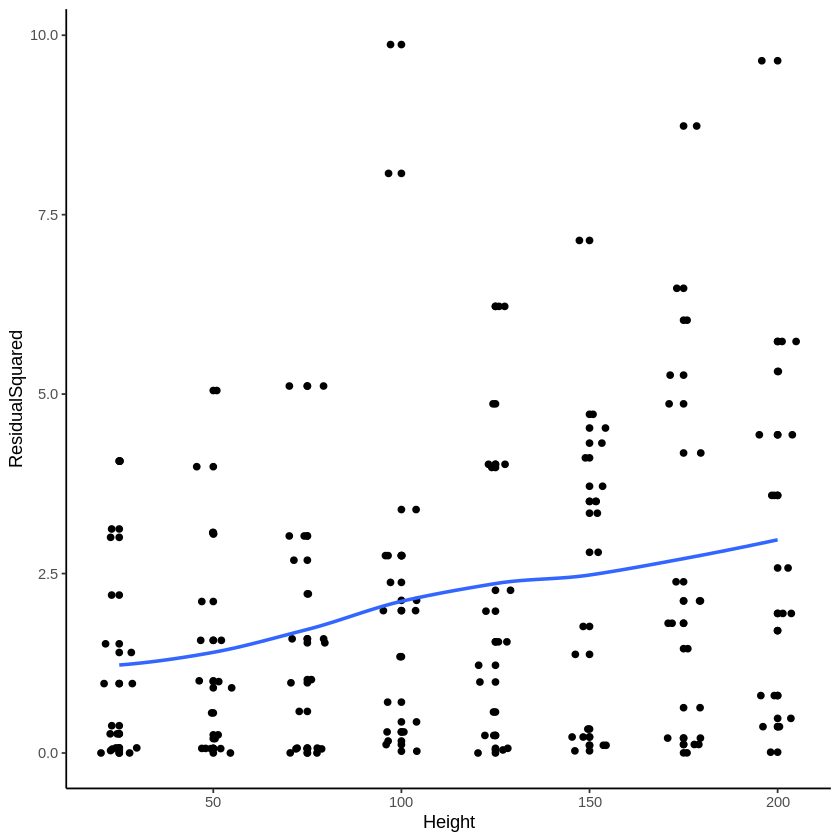

In [28]:
#Create plot with Conditional Variance Function via Loess
ggplot(data=ImpactCrater_with_LoessResiduals, aes(x=Height,y=ResidualSquared)) + 
  geom_point() + 
  geom_jitter(width=5) +  
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) + 
  theme_classic()


Next, getting the predicted values for the variance function.  The square root of the predicted is needed to transform values onto the appropriate scale.

In [29]:
#Next, use a loess smoother to fit the squared residuals against height
LoessFitVariance <- loess(ResidualSquared ~ Height, data=ImpactCrater_with_LoessResiduals)

#Appending columns to ImpactCrater data.frame
ImpactCrater_with_Mean_and_Variance <- (ImpactCrater_with_LoessResiduals
                    %>% mutate(VarPredicted = predict(LoessFitVariance, newdata=ImpactCrater_with_LoessResiduals) )
                    %>% mutate(StdevPredicted = sqrt(VarPredicted))
                )

head(ImpactCrater_with_Mean_and_Variance)

ID,SandType,ProjectileType,Height,Diameter,MeanPredicted,Residual,ResidualSquared,VarPredicted,StdevPredicted
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Coarse,WoodBall,25,3.75,4.983333,-1.2333333,1.5211111,1.225448,1.106999
2,Coarse,WoodBall,25,3.25,4.983333,-1.7333333,3.0044444,1.225448,1.106999
3,Coarse,WoodBall,25,3.50,4.983333,-1.4833333,2.2002778,1.225448,1.106999
4,Coarse,WoodBall,50,4.80,5.752778,-0.9527778,0.9077855,1.402566,1.184300
5,Coarse,WoodBall,50,4.50,5.752778,-1.2527778,1.5694522,1.402566,1.184300
6,Coarse,WoodBall,50,4.30,5.752778,-1.4527778,2.1105633,1.402566,1.184300


The following code can be used to plot the mean function and the standard deviation bands.  The bands shown here are for the individual data points, e.g. can be used to determine outliers.

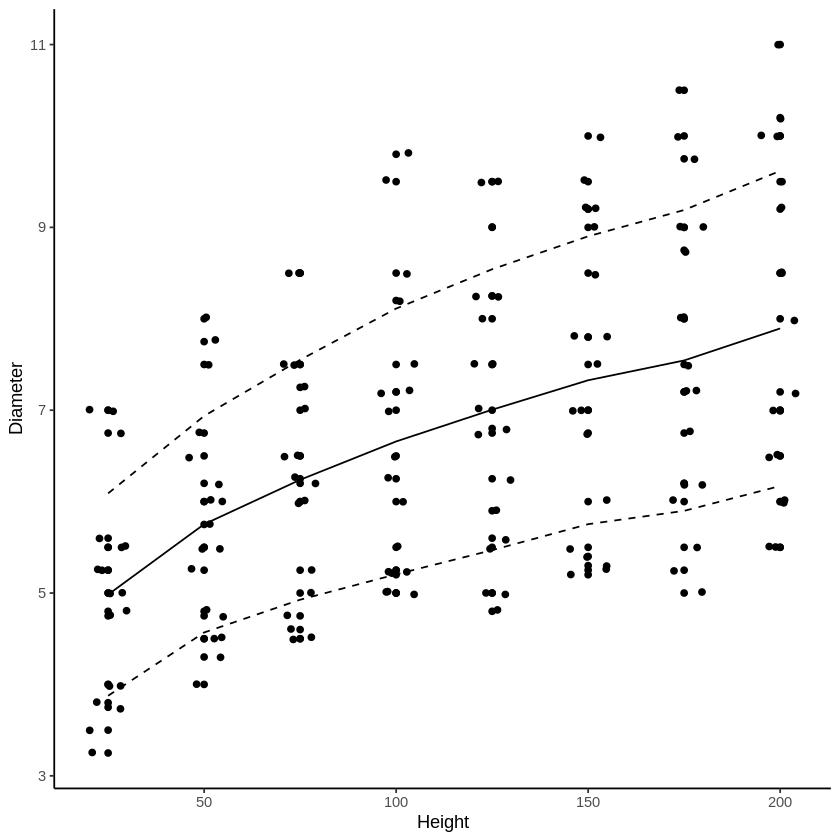

In [44]:
#Create plot with Conditional Mean Function via Loess
ggplot(data=ImpactCrater_with_Mean_and_Variance, aes(x=Height,y=Diameter)) + 
  geom_point() + 
  geom_jitter(width=5) +  
  geom_line(aes(x=Height, y=MeanPredicted)) +
  geom_line(aes(x=Height, y = (MeanPredicted + StdevPredicted)), lty=2) +
  geom_line(aes(x=Height, y = (MeanPredicted - StdevPredicted)), lty=2) +
  theme_classic()

The following can be used to determine which data points are outliers based on the conditional mean and variance functions.

In [45]:
#Checking for Outliers
ImpactCrater_with_Mean_and_Variance_withOutliers <- (ImpactCrater_with_Mean_and_Variance
                                                         %>% mutate(
                                                                      OutlierHigh = ifelse(Diameter > (MeanPredicted + 2*StdevPredicted),"Yes","No"),
                                                                      OutlierLow = ifelse(Diameter < (MeanPredicted - 2*StdevPredicted),"Yes","No")
                                                                   )
                                                         %>% filter(OutlierHigh == "Yes" | OutlierLow == "Yes")
                                                    )

ImpactCrater_with_Mean_and_Variance_withOutliers

ID,SandType,ProjectileType,Height,Diameter,MeanPredicted,Residual,ResidualSquared,VarPredicted,StdevPredicted,OutlierHigh,OutlierLow
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
106,Fine,SteelBall,100,9.8,6.658333,3.141667,9.870069,2.113157,1.45367,Yes,No


<table width='100%'><tr><td bgcolor="orange"><font size="+2">Task</font></td></tr></table>

### Task:  Questions

<table width='100%'><tr><td bgcolor="orange"><font size="+2">&nbsp;</font></td></tr></table>

End of Document